In [1]:
# snow drought

In [2]:
import rioxarray as rxr
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

In [3]:
sro_westernus_2015 = rxr.open_rasterio(f"https://snowmelt.blob.core.windows.net/snowmelt/eric/products/merged_2015_median_80m.tif",mask_and_scale=True)
sro_westernus_2015to2022_median = rxr.open_rasterio(f"https://snowmelt.blob.core.windows.net/snowmelt/eric/products/merged_allyears_median_80m.tif",mask_and_scale=True)

In [4]:
difference = sro_westernus_2015-sro_westernus_2015to2022_median

In [5]:
#difference.mean()

In [6]:
#difference.median()

In [7]:
#difference.astype('float32').rio.to_raster('difference.tif', driver="COG",dtype='float32')

In [9]:
difference_cascades_proj = difference.rio.reproject('EPSG:32610')

In [10]:
north_cascades = gpd.read_file('nbndry_g2.shp')
north_cascades_proj = north_cascades.to_crs('EPSG:32610')

In [16]:
difference_cascades_proj = difference_cascades_proj.rio.clip(north_cascades_proj.geometry)
difference_cascades_proj = difference_cascades_proj.where(difference_cascades_proj<60)

(5340000.0, 5430000.0)

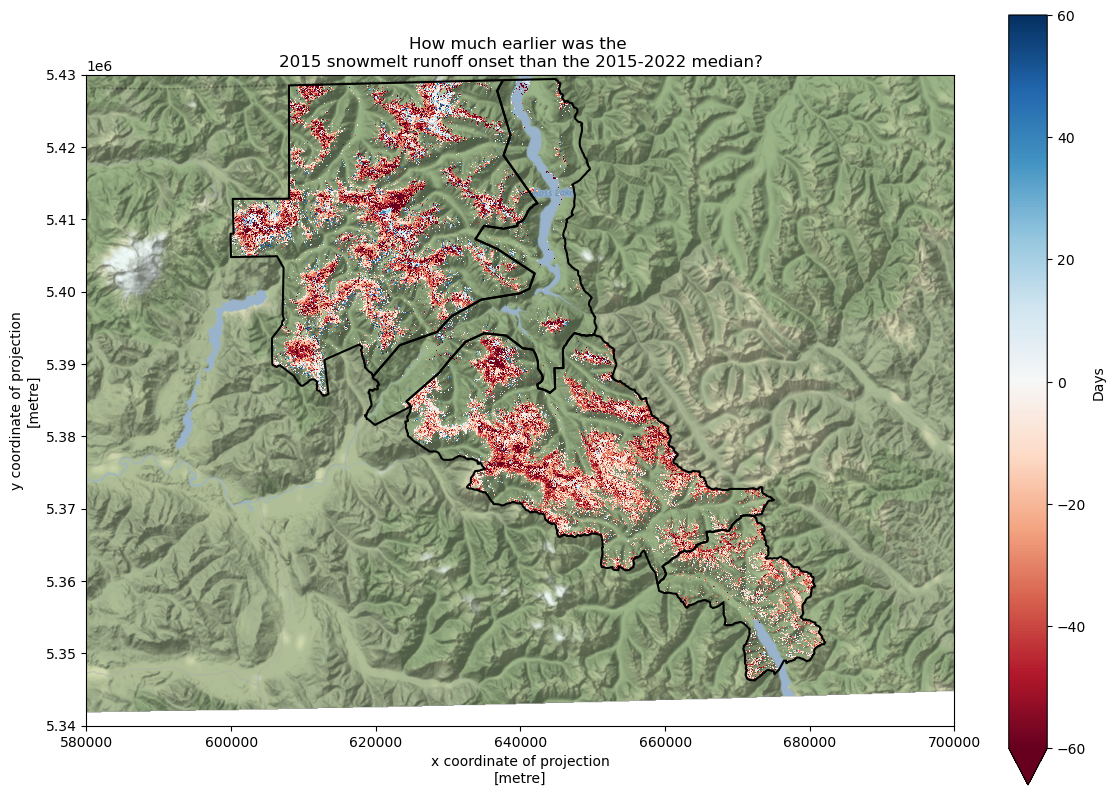

In [29]:
f,ax=plt.subplots(figsize=(14,10))
difference_cascades_proj.plot(ax=ax,vmin=-60,vmax=60,cmap='RdBu',cbar_kwargs={"label": "Days"})
north_cascades_proj.boundary.plot(ax=ax,color='black')
ctx.add_basemap(ax=ax, crs=north_cascades_proj.crs, source=ctx.providers.Stamen.Terrain, attribution=False)
ax.set_title('How much earlier was the \n2015 snowmelt runoff onset than the 2015-2022 median?')
ax.set_xlim([580000,700000])
ax.set_ylim([5.34E6,5.43E6])

In [20]:
difference_cascades_proj.mean()

<xarray.DataArray ()>
array(-24.076723, dtype=float32)
Coordinates:
    spatial_ref  int64 0